In [22]:
import math
import warnings

from pandas import ExcelWriter
from pandas import ExcelFile

import scipy.stats

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf
import os

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score

In [7]:
cwd = os.getcwd()
print(cwd)

os.chdir(r'''C:\Users\wscott\AppData\Local\Programs\Python''')
print(cwd)

C:\Users\wscott\AppData\Local\Programs\Python
C:\Users\wscott\AppData\Local\Programs\Python


In [14]:
df = pd.read_csv('Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


In [57]:
mean = 0
X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]

for x in range(1,30):
    knn_w = KNeighborsRegressor(n_neighbors=x, weights='distance')
    
    score_w = cross_val_score(knn_w, X, Y, cv=5)
#    print(score_w.mean())
    
    
    if mean <= score_w.mean():
        mean = score_w.mean()
        print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
        
    

Weighted Accuracy: 0.00 (+/- 1.01)
Weighted Accuracy: 0.04 (+/- 1.04)
Weighted Accuracy: 0.14 (+/- 0.73)
Weighted Accuracy: 0.22 (+/- 0.50)
Weighted Accuracy: 0.26 (+/- 0.40)
Weighted Accuracy: 0.26 (+/- 0.36)
Weighted Accuracy: 0.29 (+/- 0.31)
Weighted Accuracy: 0.30 (+/- 0.29)
Weighted Accuracy: 0.31 (+/- 0.28)


In [62]:
x = X
y = Y.values.reshape(-1,1)

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)

score_w = cross_val_score(regr, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Coefficients from sklearn: 
 [[ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
   0.02019035  0.11422207]]

Intercept from sklearn: 
 [-23.33121358]
Weighted Accuracy: 0.46 (+/- 0.19)



Coefficients from sklearn: 
 [[1.97424551]]

Intercept from sklearn: 
 [0.51584974]

Coefficients from gradient descent algorithm: 
 1.9737815909071057

Intercept from gradient descent algorithm: 
 0.5157251988172974


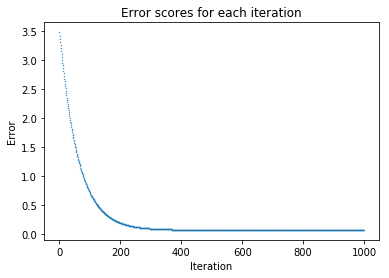

In [52]:
## Cost function for the linear regression that we will try to optimize.
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision-points described above.
# How many steps to take.
stop = 1000

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0

# Time to make some data!
x = X
y = Y

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Run the algorithm.
for iter in range(stop):
    
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    
    # Store the error to instpect later.
    all_error.append(error)

    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()